Embeddings und Ground Truth erfolgreich geladen.
Ground Truth Paare (Beispiel): [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]
Für ID 0: Top-k IDs (Threshold=0.95) = [0], erwartet = 0
Für ID 1: Top-k IDs (Threshold=0.95) = [1], erwartet = 1
Für ID 2: Top-k IDs (Threshold=0.95) = [2], erwartet = 2
Für ID 3: Top-k IDs (Threshold=0.95) = [3], erwartet = 3
Für ID 4: Top-k IDs (Threshold=0.95) = [4], erwartet = 4
Für ID 5: Top-k IDs (Threshold=0.95) = [5], erwartet = 5
Für ID 6: Top-k IDs (Threshold=0.95) = [6], erwartet = 6
Für ID 7: Top-k IDs (Threshold=0.95) = [7], erwartet = 7
Für ID 8: Top-k IDs (Threshold=0.95) = [8], erwartet = 8
Für ID 9: Top-k IDs (Threshold=0.95) = [9], erwartet = 9
Für ID 0: Top-k IDs (Threshold=0.95) = [0], erwartet = 0
Für ID 1: Top-k IDs (Threshold=0.95) = [1], erwartet = 1
Für ID 2: Top-k IDs (Threshold=0.95) = [2], erwartet = 2
Für ID 3: Top-k IDs (Threshold=0.95) = [3], erwartet = 3
Für ID 4: Top-k IDs (Threshold=0.95) = [4], erwartet = 4
Für ID 5: Top-k IDs (Thr

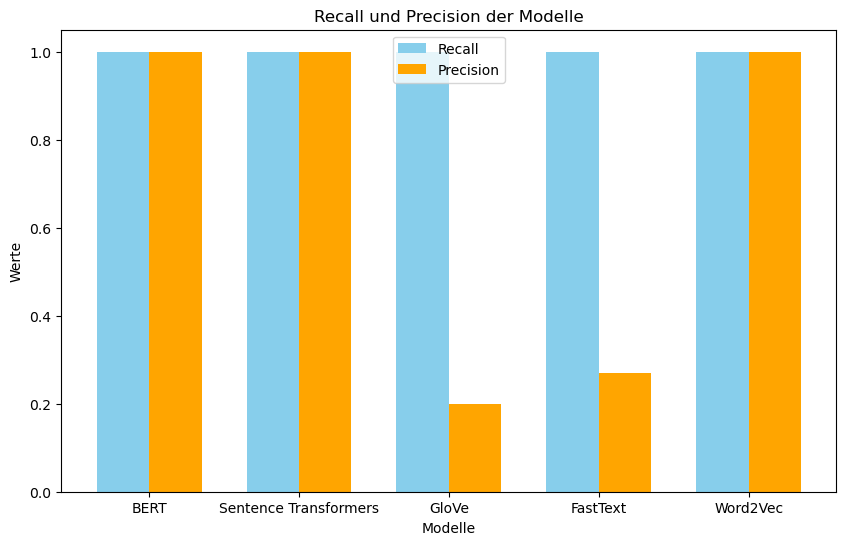

Ergebnisse gespeichert unter: /Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/results/model_recall_precision.csv


In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# 1. Daten laden
# Ground Truths
ground_truth_path = "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/processed/ground_truth.csv"
ground_truth_df = pd.read_csv(ground_truth_path)

# Embeddings laden
embedding_files = {
    "BERT": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/bert_embeddings.npy",
    "Sentence Transformers": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/sentence_transformers_embeddings.npy",
    "GloVe": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/glove_embeddings.npy",
    "FastText": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/fasttext_embeddings.npy",
    "Word2Vec": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/word2vec_embeddings.npy",
}
embeddings = {model: np.load(path) for model, path in embedding_files.items()}

print("Embeddings und Ground Truth erfolgreich geladen.")

# Ground Truth strukturieren
ground_truth_df["Similar_IDs"] = ground_truth_df["Similar_IDs"].astype(str)
ground_truth = [
    (row["ID"], int(sim_id)) 
    for _, row in ground_truth_df.iterrows() 
    for sim_id in row["Similar_IDs"].split(",") if sim_id.strip()
]
print(f"Ground Truth Paare (Beispiel): {ground_truth[:5]}")

# 2. Cosine Similarity berechnen
def calculate_similarity_matrices(embeddings):
    """Berechnet Cosine Similarity für alle Modelle."""
    return {model: cosine_similarity(vecs) for model, vecs in embeddings.items()}

similarity_matrices = calculate_similarity_matrices(embeddings)

#Recall und Precision berechnen mit Thresholds
model_thresholds = {
    "BERT": 0.95,
    "Sentence Transformers": 0.95,
    "GloVe": 0.95,
    "FastText": 0.95,
    "Word2Vec": 0.95,
}

def calculate_recall_precision_with_threshold(similarity_matrix, ground_truth, top_k=5, threshold=0.9):
    """Berechnet Recall und Precision basierend auf Ground Truth mit Schwellenwert."""
    total_relevant = len(ground_truth)
    found_relevant = 0
    total_returned = 0

    for i, j in ground_truth:
        top_k_indices = similarity_matrix[i].argsort()[-top_k:][::-1]
        top_k_ids = [idx for idx in top_k_indices if similarity_matrix[i, idx] >= threshold]
        total_returned += len(top_k_ids)

        
        print(f"Für ID {i}: Top-k IDs (Threshold={threshold}) = {top_k_ids}, erwartet = {j}")

        if j in top_k_ids:
            found_relevant += 1

    recall = found_relevant / total_relevant
    precision = found_relevant / total_returned if total_returned > 0 else 0
    return recall, precision

# Ergebnisse für alle Modelle berechnen
results = []
for model, sim_matrix in similarity_matrices.items():
    threshold = model_thresholds[model]
    recall, precision = calculate_recall_precision_with_threshold(sim_matrix, ground_truth, top_k=5, threshold=threshold)
    results.append({"Model": model, "Recall": recall, "Precision": precision})

results_df = pd.DataFrame(results)

# Ergebnisse ausgeben
print("Ergebnisse für alle Modelle:")
print(results_df)

# 4. Visualisierung der Ergebnisse

# Bar-Chart erstellen
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(results_df["Model"]))
width = 0.35

ax.bar(x - width/2, results_df["Recall"], width, label="Recall", color="skyblue")
ax.bar(x + width/2, results_df["Precision"], width, label="Precision", color="orange")

# Achsen und Titel
ax.set_xlabel("Modelle")
ax.set_ylabel("Werte")
ax.set_title("Recall und Precision der Modelle")
ax.set_xticks(x)
ax.set_xticklabels(results_df["Model"])
ax.legend()

plt.show()

# Ergebnisse speichern
results_path = "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/results/model_recall_precision.csv"
results_df.to_csv(results_path, index=False)
print(f"Ergebnisse gespeichert unter: {results_path}")


Ground Truth Paare (Beispiel): [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]


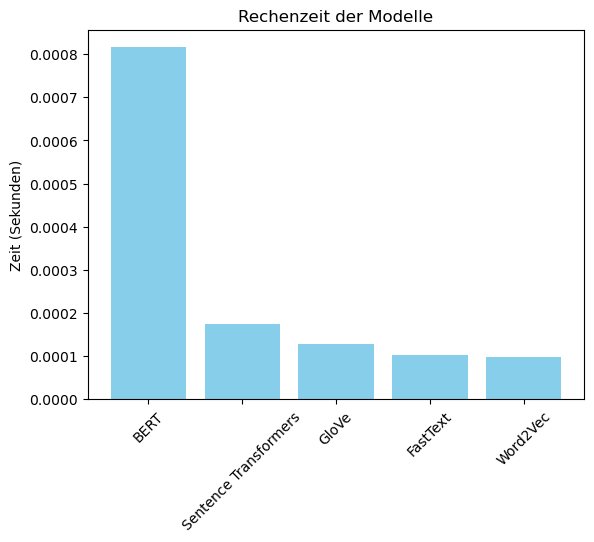

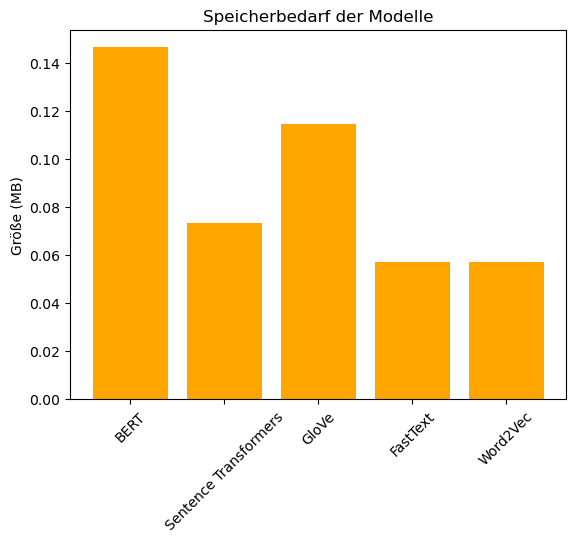

Noisy Reviews Beispiel: ['Unable teyfrder after registration as wqe account was fyozfn and documents wfre requested The revaew nook avvr a week withpno resolution', 'Multiyhe orders had issues One was delivered llte andhtde second was undezivered blcausd thv address was missing vn thy packwging', 'Deliverypinstructions wererignoredfThe package was sant despite thebacfount being closed and tje dbligery setdings being misser']
Robustheitstest: Recall = 1.0000, Precision = 0.2000


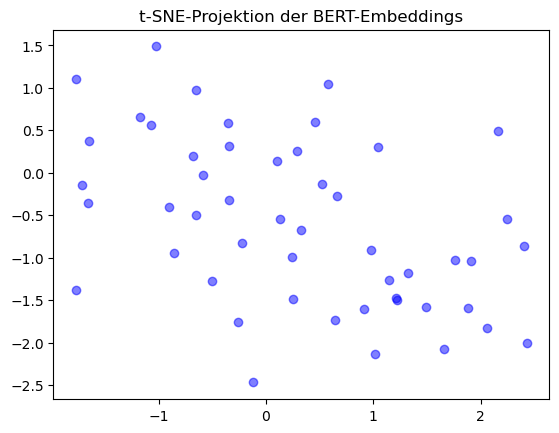

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import time
import os
import random

# 1. Daten laden
# Ground Truths
ground_truth_path = "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/processed/ground_truth.csv"
ground_truth_df = pd.read_csv(ground_truth_path)

# Embeddings
embedding_files = {
    "BERT": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/bert_embeddings.npy",
    "Sentence Transformers": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/sentence_transformers_embeddings.npy",
    "GloVe": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/glove_embeddings.npy",
    "FastText": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/fasttext_embeddings.npy",
    "Word2Vec": "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/data/vectors/word2vec_embeddings.npy",
}

# Ground Truth vorbereiten
ground_truth_df["Similar_IDs"] = ground_truth_df["Similar_IDs"].astype(str)
ground_truth = [
    (row["ID"], int(sim_id))
    for _, row in ground_truth_df.iterrows()
    for sim_id in row["Similar_IDs"].split(",") if sim_id.strip()
]
print(f"Ground Truth Paare (Beispiel): {ground_truth[:5]}")

# 2. Rechenzeit messen
model_times = {}
for model, path in embedding_files.items():
    start_time = time.time()
    _ = np.load(path)  # Embeddings laden
    model_times[model] = time.time() - start_time

# Visualisierung der Rechenzeiten
plt.bar(model_times.keys(), model_times.values(), color="skyblue")
plt.title("Rechenzeit der Modelle")
plt.ylabel("Zeit (Sekunden)")
plt.xticks(rotation=45)
plt.show()

# 3. Speicherbedarf analysieren
model_sizes = {model: os.path.getsize(path) / (1024 ** 2) for model, path in embedding_files.items()}

# Visualisierung des Speicherbedarfs
plt.bar(model_sizes.keys(), model_sizes.values(), color="orange")
plt.title("Speicherbedarf der Modelle")
plt.ylabel("Größe (MB)")
plt.xticks(rotation=45)
plt.show()

# 4. Robustheitstest: Textrauschen hinzufügen
def add_noise(text, noise_level=0.1):
    """Fügt zufällige Zeichen zum Text hinzu."""
    text = list(text)
    num_noisy_chars = int(len(text) * noise_level)
    for _ in range(num_noisy_chars):
        idx = random.randint(0, len(text) - 1)
        text[idx] = random.choice("abcdefghijklmnopqrstuvwxyz ")
    return "".join(text)

# Rauschen hinzufügen
noisy_reviews = [add_noise(text, noise_level=0.1) for text in ground_truth_df["Text"]]
print(f"Noisy Reviews Beispiel: {noisy_reviews[:3]}")

# Embeddings neu berechnen (Beispiel für BERT)
bert_embeddings = np.load(embedding_files["BERT"])
similarity_matrix = cosine_similarity(bert_embeddings)

# Robustheit: Recall und Precision erneut berechnen
def calculate_recall_precision(similarity_matrix, ground_truth, top_k=5):
    """Berechnet Recall und Precision basierend auf Ground Truth."""
    total_relevant = len(ground_truth)
    found_relevant = 0
    total_returned = 0

    for i, j in ground_truth:
        top_k_indices = similarity_matrix[i].argsort()[-top_k:][::-1]
        total_returned += len(top_k_indices)

        if j in top_k_indices:
            found_relevant += 1

    recall = found_relevant / total_relevant
    precision = found_relevant / total_returned if total_returned > 0 else 0
    return recall, precision

recall, precision = calculate_recall_precision(similarity_matrix, ground_truth)
print(f"Robustheitstest: Recall = {recall:.4f}, Precision = {precision:.4f}")

# 5. t-SNE-Projektionen erstellen
tsne = TSNE(n_components=2, random_state=42)
bert_2d = tsne.fit_transform(bert_embeddings)

# Visualisierung der t-SNE-Projektionen
plt.scatter(bert_2d[:, 0], bert_2d[:, 1], alpha=0.5, color="blue")
plt.title("t-SNE-Projektion der BERT-Embeddings")
plt.show()


Starte Cluster-Analyse für BERT...
BERT - Silhouette-Score: 0.0533


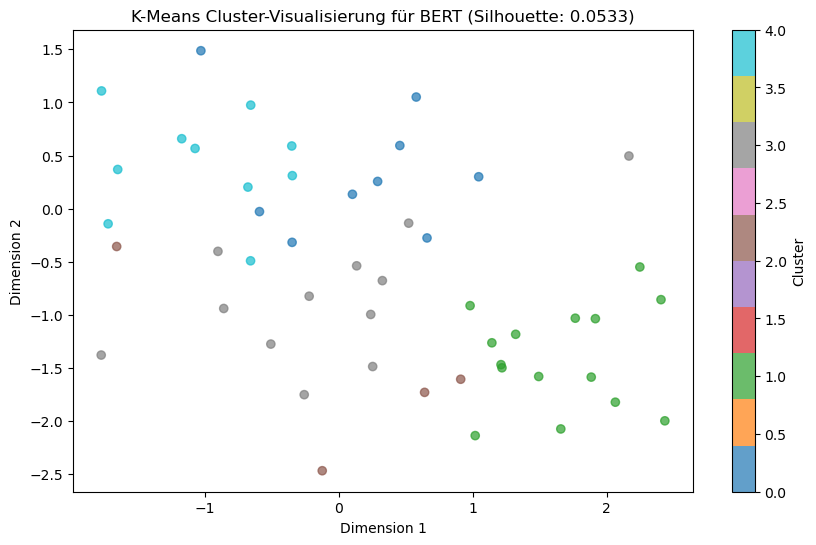

Starte Cluster-Analyse für Sentence Transformers...
Sentence Transformers - Silhouette-Score: 0.0200


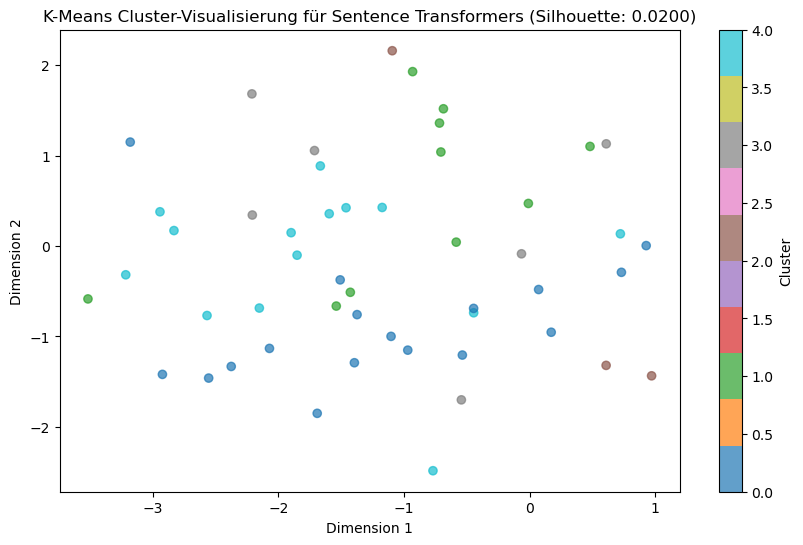

Starte Cluster-Analyse für GloVe...
GloVe - Silhouette-Score: -0.0242


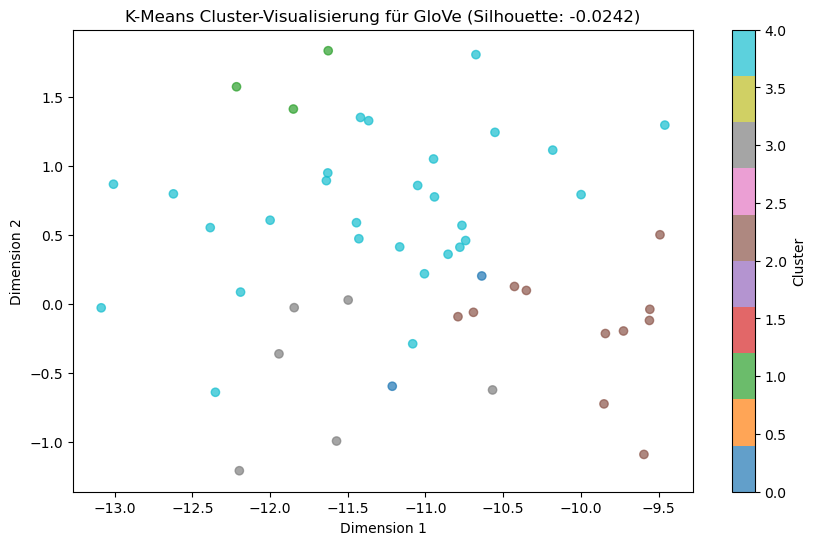

Starte Cluster-Analyse für FastText...
FastText - Silhouette-Score: 0.0096


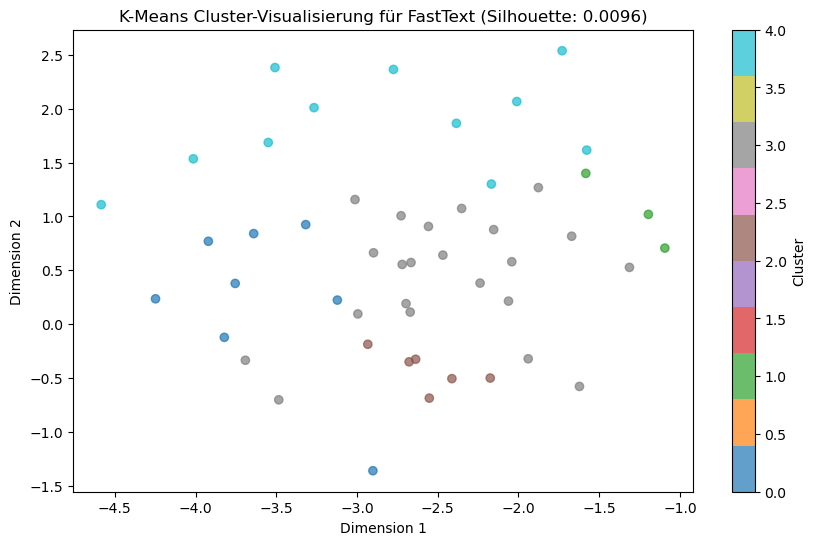

Starte Cluster-Analyse für Word2Vec...
Word2Vec - Silhouette-Score: 0.0083


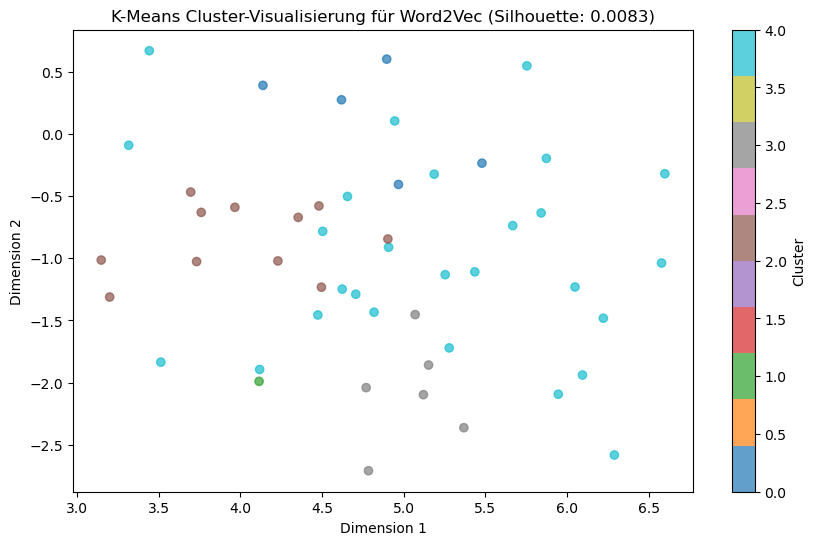

In [7]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Funktion für die Cluster-Analyse und Visualisierung
def analyze_and_plot_clusters(embeddings, model_name, n_clusters=2):
    """
    Führt eine Cluster-Analyse durch und visualisiert die t-SNE-Projektion mit K-Means-Clustern.
    """
    # t-SNE für Dimensionsreduktion
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)

    # K-Means anwenden
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    predicted_labels = kmeans.fit_predict(embeddings)

    # Scoring
    silhouette = silhouette_score(embeddings, predicted_labels)
    print(f"{model_name} - Silhouette-Score: {silhouette:.4f}")

    # Visualisierung der Cluster
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        reduced_embeddings[:, 0],
        reduced_embeddings[:, 1],
        c=predicted_labels,  # Cluster als Farben
        cmap="tab10",  # Diskrete Farben für Cluster
        alpha=0.7
    )
    plt.colorbar(scatter, label="Cluster")
    plt.title(f"K-Means Cluster-Visualisierung für {model_name} (Silhouette: {silhouette:.4f})")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Cluster-Analyse für alle Modelle
for model, path in embedding_files.items():
    embeddings = np.load(path)
    print(f"Starte Cluster-Analyse für {model}...")
    analyze_and_plot_clusters(embeddings, model_name=model, n_clusters=5)


Starte Optimierung für BERT...
BERT - Cluster: 2, Silhouette-Score: 0.0926
BERT - Cluster: 3, Silhouette-Score: 0.0737
BERT - Cluster: 4, Silhouette-Score: 0.0495
BERT - Cluster: 5, Silhouette-Score: 0.0533
BERT - Cluster: 6, Silhouette-Score: 0.0314
BERT - Cluster: 7, Silhouette-Score: 0.0208
BERT - Cluster: 8, Silhouette-Score: 0.0221
BERT - Cluster: 9, Silhouette-Score: 0.0291
BERT - Cluster: 10, Silhouette-Score: 0.0229
BERT: Beste Anzahl von Clustern = 2, Silhouette-Score = 0.0926


/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


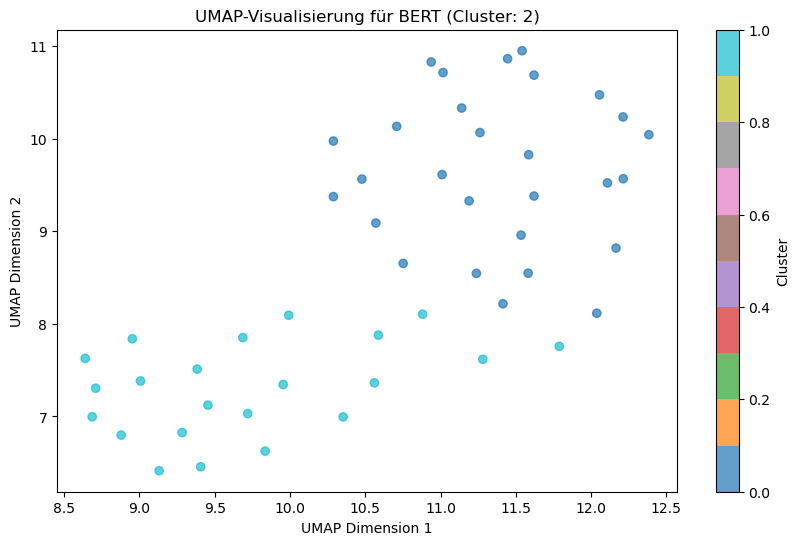

Starte Optimierung für Sentence Transformers...
Sentence Transformers - Cluster: 2, Silhouette-Score: 0.0741
Sentence Transformers - Cluster: 3, Silhouette-Score: 0.0354
Sentence Transformers - Cluster: 4, Silhouette-Score: 0.0257
Sentence Transformers - Cluster: 5, Silhouette-Score: 0.0200
Sentence Transformers - Cluster: 6, Silhouette-Score: 0.0193
Sentence Transformers - Cluster: 7, Silhouette-Score: 0.0175
Sentence Transformers - Cluster: 8, Silhouette-Score: 0.0061
Sentence Transformers - Cluster: 9, Silhouette-Score: 0.0123
Sentence Transformers - Cluster: 10, Silhouette-Score: 0.0176
Sentence Transformers: Beste Anzahl von Clustern = 2, Silhouette-Score = 0.0741


/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


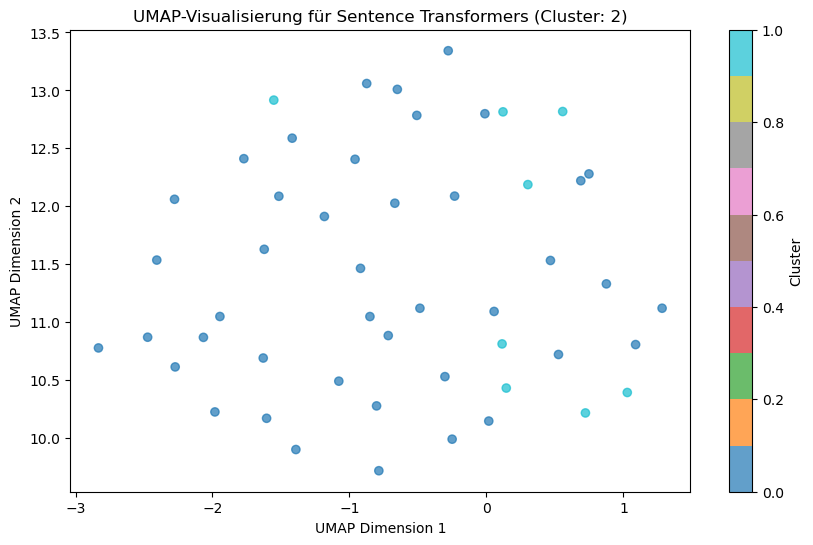

Starte Optimierung für GloVe...
GloVe - Cluster: 2, Silhouette-Score: 0.0576
GloVe - Cluster: 3, Silhouette-Score: 0.0646
GloVe - Cluster: 4, Silhouette-Score: 0.0179
GloVe - Cluster: 5, Silhouette-Score: -0.0242
GloVe - Cluster: 6, Silhouette-Score: -0.0199
GloVe - Cluster: 7, Silhouette-Score: 0.0193
GloVe - Cluster: 8, Silhouette-Score: 0.0058
GloVe - Cluster: 9, Silhouette-Score: -0.0132
GloVe - Cluster: 10, Silhouette-Score: -0.0118
GloVe: Beste Anzahl von Clustern = 3, Silhouette-Score = 0.0646


/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


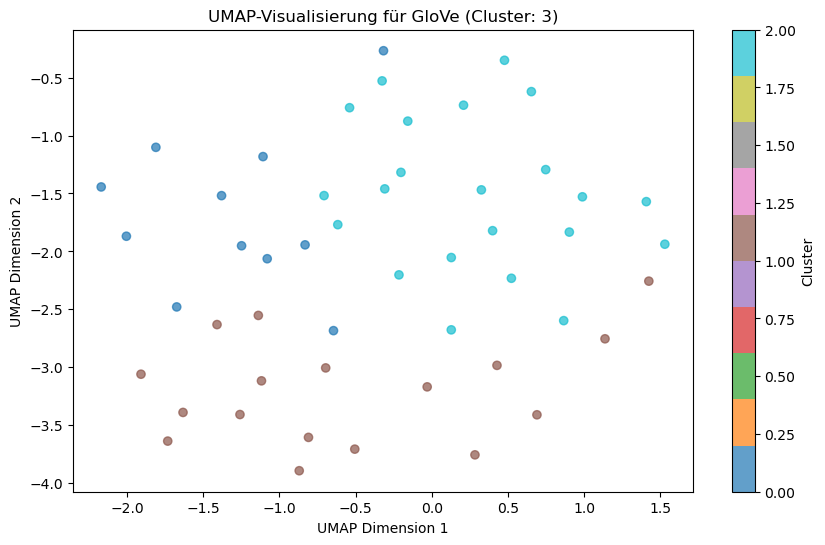

Starte Optimierung für FastText...
FastText - Cluster: 2, Silhouette-Score: 0.0584
FastText - Cluster: 3, Silhouette-Score: 0.0534
FastText - Cluster: 4, Silhouette-Score: 0.0094
FastText - Cluster: 5, Silhouette-Score: 0.0096
FastText - Cluster: 6, Silhouette-Score: 0.0122
FastText - Cluster: 7, Silhouette-Score: 0.0159
FastText - Cluster: 8, Silhouette-Score: 0.0007
FastText - Cluster: 9, Silhouette-Score: 0.0021
FastText - Cluster: 10, Silhouette-Score: 0.0021
FastText: Beste Anzahl von Clustern = 2, Silhouette-Score = 0.0584


/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


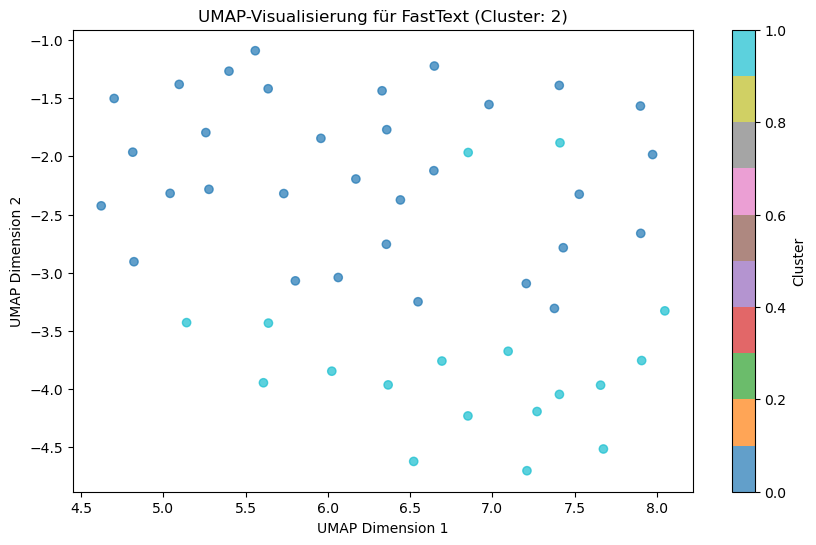

Starte Optimierung für Word2Vec...
Word2Vec - Cluster: 2, Silhouette-Score: 0.0505
Word2Vec - Cluster: 3, Silhouette-Score: 0.0412
Word2Vec - Cluster: 4, Silhouette-Score: 0.0179
Word2Vec - Cluster: 5, Silhouette-Score: 0.0083
Word2Vec - Cluster: 6, Silhouette-Score: 0.0068
Word2Vec - Cluster: 7, Silhouette-Score: 0.0095
Word2Vec - Cluster: 8, Silhouette-Score: 0.0190
Word2Vec - Cluster: 9, Silhouette-Score: 0.0188
Word2Vec - Cluster: 10, Silhouette-Score: 0.0132
Word2Vec: Beste Anzahl von Clustern = 2, Silhouette-Score = 0.0505


/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/john-thomas/anaconda3/envs/datamanagement/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


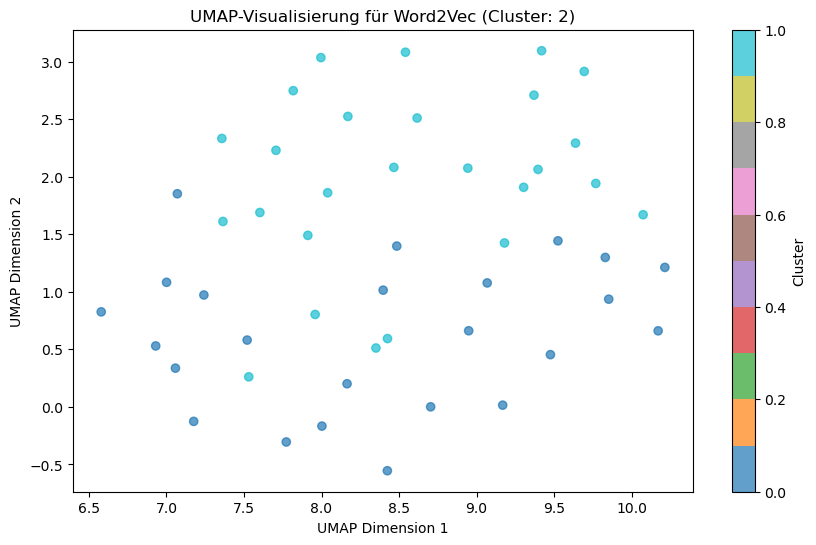

Optimierungsergebnisse:
                   Model  Best Clusters  Silhouette Score
0                   BERT              2          0.092615
1  Sentence Transformers              2          0.074084
2                  GloVe              3          0.064609
3               FastText              2          0.058384
4               Word2Vec              2          0.050535
Ergebnisse gespeichert unter: /Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/results/cluster_optimization.csv


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
import numpy as np

# Funktion zur automatischen Cluster-Optimierung
def optimize_clusters(embeddings, model_name, min_clusters=2, max_clusters=10):
    """
    Findet die optimale Anzahl von Clustern basierend auf dem Silhouette-Score.
    """
    best_n_clusters = None
    best_silhouette = -1

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        predicted_labels = kmeans.fit_predict(embeddings)
        silhouette = silhouette_score(embeddings, predicted_labels)

        print(f"{model_name} - Cluster: {n_clusters}, Silhouette-Score: {silhouette:.4f}")

        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_n_clusters = n_clusters

    print(f"{model_name}: Beste Anzahl von Clustern = {best_n_clusters}, Silhouette-Score = {best_silhouette:.4f}")
    return best_n_clusters, best_silhouette

# Alternative Visualisierung mit UMAP
def visualize_with_umap(embeddings, model_name, n_clusters):
    """
    Visualisiert die Embeddings mit UMAP und K-Means-Clustern.
    """
    reducer = umap.UMAP(n_components=2, random_state=42)
    reduced_embeddings = reducer.fit_transform(embeddings)

    # K-Means anwenden
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    predicted_labels = kmeans.fit_predict(embeddings)

    # Visualisierung
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        reduced_embeddings[:, 0],
        reduced_embeddings[:, 1],
        c=predicted_labels,  # Clusterfarben
        cmap="tab10",  # Diskrete Farben
        alpha=0.7
    )
    plt.colorbar(scatter, label="Cluster")
    plt.title(f"UMAP-Visualisierung für {model_name} (Cluster: {n_clusters})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.show()

# Haupt-Workflow
results = []
for model, path in embedding_files.items():
    embeddings = np.load(path)
    print(f"Starte Optimierung für {model}...")
    
    # Optimale Anzahl von Clustern finden
    best_n_clusters, best_silhouette = optimize_clusters(embeddings, model_name=model)
    results.append({"Model": model, "Best Clusters": best_n_clusters, "Silhouette Score": best_silhouette})
    
    # Visualisierung mit UMAP
    visualize_with_umap(embeddings, model_name=model, n_clusters=best_n_clusters)

# Ergebnisse als DataFrame speichern
results_df = pd.DataFrame(results)
print("Optimierungsergebnisse:")
print(results_df)

# Ergebnisse speichern
results_path = "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/results/cluster_optimization.csv"
results_df.to_csv(results_path, index=False)
print(f"Ergebnisse gespeichert unter: {results_path}")


In [20]:
import os
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer
from gensim.models import KeyedVectors
import fasttext

# Konvertiere GloVe-Datei ins Word2Vec-Format (falls nicht bereits geschehen)
def convert_glove_to_word2vec(glove_input_file, word2vec_output_file):
    if not os.path.exists(word2vec_output_file):
        print(f"Konvertiere GloVe-Datei: {glove_input_file} -> {word2vec_output_file}")
        with open(glove_input_file, "r", encoding="utf-8") as glove_file:
            lines = glove_file.readlines()
        vocab_size = len(lines)
        vector_size = len(lines[0].split()) - 1
        with open(word2vec_output_file, "w", encoding="utf-8") as word2vec_file:
            word2vec_file.write(f"{vocab_size} {vector_size}\n")
            word2vec_file.writelines(lines)
        print("GloVe-Datei erfolgreich konvertiert.")
    else:
        print(f"GloVe-Datei bereits im Word2Vec-Format: {word2vec_output_file}")

# Funktion zur Generierung von Embeddings
def generate_embeddings(texts, model_name):
    if model_name == "BERT":
        tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
        model = BertModel.from_pretrained("bert-base-uncased")
        embeddings = []
        for text in texts:
            inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
            with torch.no_grad():
                outputs = model(**inputs)
                cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
                embeddings.append(cls_embedding)
        return np.array(embeddings)

    elif model_name == "Sentence Transformers":
        model = SentenceTransformer("all-MiniLM-L6-v2")
        return model.encode(texts)

    elif model_name == "GloVe":
        glove_input_path = "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/modells/pretrained_models/glove.6B.300d.txt"
        word2vec_output_path = "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/modells/pretrained_models/glove.6B.300d.word2vec.txt"
        convert_glove_to_word2vec(glove_input_path, word2vec_output_path)
        glove_model = KeyedVectors.load_word2vec_format(word2vec_output_path, binary=False)
        embeddings = [
            np.mean(
                [glove_model[word] for word in text.split() if word in glove_model],
                axis=0
            ) if any(word in glove_model for word in text.split()) else np.zeros(glove_model.vector_size)
            for text in texts
        ]
        return np.array(embeddings)

    elif model_name == "FastText":
        model_path = "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/modells/pretrained_models/cc.en.300.bin"
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"FastText-Modell nicht gefunden: {model_path}")
        fasttext_model = fasttext.load_model(model_path)
        embeddings = [
            np.mean(
                [fasttext_model.get_word_vector(word) for word in text.split() if word],
                axis=0
            ) if text.split() else np.zeros(fasttext_model.get_dimension())
            for text in texts
        ]
        return np.array(embeddings)

    elif model_name == "Word2Vec":
        model_path = "/Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/modells/pretrained_models/GoogleNews-vectors-negative300.bin"
        word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
        embeddings = [
            np.mean(
                [word2vec_model[word] for word in text.split() if word in word2vec_model],
                axis=0
            ) if any(word in word2vec_model for word in text.split()) else np.zeros(word2vec_model.vector_size)
            for text in texts
        ]
        return np.array(embeddings)

    else:
        raise ValueError(f"Embedding-Generierung für {model_name} nicht implementiert.")

# Beispielaufruf
if __name__ == "__main__":
    texts = [
        "The product was amazing and worked perfectly.",
        "I had issues with the delivery but the service was helpful.",
        "Great quality and fast shipping.",
        "Terrible experience with customer service.",
        "The item was damaged during shipping, very disappointing.",
    ]

    models = ["BERT", "Sentence Transformers", "GloVe", "FastText", "Word2Vec"]
    for model_name in models:
        print(f"Starte Generierung der Embeddings für {model_name}...")
        embeddings = generate_embeddings(texts, model_name)
        print(f"Embeddings für {model_name} erfolgreich generiert. Shape: {embeddings.shape}")


Starte Generierung der Embeddings für BERT...
Embeddings für BERT erfolgreich generiert. Shape: (5, 768)
Starte Generierung der Embeddings für Sentence Transformers...
Embeddings für Sentence Transformers erfolgreich generiert. Shape: (5, 384)
Starte Generierung der Embeddings für GloVe...
GloVe-Datei bereits im Word2Vec-Format: /Users/john-thomas/Desktop/Seminararbeit Embedding Modelle/modells/pretrained_models/glove.6B.300d.word2vec.txt
Embeddings für GloVe erfolgreich generiert. Shape: (5, 300)
Starte Generierung der Embeddings für FastText...
Embeddings für FastText erfolgreich generiert. Shape: (5, 300)
Starte Generierung der Embeddings für Word2Vec...
Embeddings für Word2Vec erfolgreich generiert. Shape: (5, 300)


In [25]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import random

# Funktion zur Erzeugung von realistischem Rauschen
def add_realistic_noise(text):
    """
    Fügt einem Text realistischeres Rauschen hinzu, z. B. das Vertauschen von Wörtern,
    das Ersetzen durch zufällige Wörter oder das Entfernen von Wörtern.
    """
    words = text.split()
   #if len(words) < 2:  # Kein Rauschen hinzufügen, wenn der Text zu kurz ist
    #    return text

    noisy_text = words.copy()

    # Vertauschung von Wörtern
    if random.random() < 0.3:  # 30% Wahrscheinlichkeit
        idx1, idx2 = random.sample(range(len(noisy_text)), 2)
        noisy_text[idx1], noisy_text[idx2] = noisy_text[idx2], noisy_text[idx1]

    # Ersatz von Wörtern
    if random.random() < 0.3:  # 30% Wahrscheinlichkeit
        idx = random.randint(0, len(noisy_text) - 1)
        random_word = random.choice(["example", "random", "noise", "test", "word"])
        noisy_text[idx] = random_word

    # Hinzufügen von zufälligen Wörtern
    if random.random() < 0.2:  # 20% Wahrscheinlichkeit
        idx = random.randint(0, len(noisy_text))
        random_word = random.choice(["example", "random", "noise", "test", "word"])
        noisy_text.insert(idx, random_word)

    # Entfernen von Wörtern
    if random.random() < 0.2:  # 20% Wahrscheinlichkeit
        if len(noisy_text) > 1:
            idx = random.randint(0, len(noisy_text) - 1)
            noisy_text.pop(idx)

    return " ".join(noisy_text)

# Funktion zur Erzeugung von OOV-Texten
def add_oov(text):
    """Fügt ein Out-of-Vocabulary-Wort an das Ende des Textes hinzu."""
    return text + " qwertz"

# Funktion zur Generierung von Embeddings
def generate_embeddings(texts, model_name):
    """
    Platzhalter für die Embedding-Generierung. Überprüfen Sie, ob alle Modelle korrekt implementiert sind.
    """
    print(f"Generiere Embeddings für {model_name}... (Anzahl Texte: {len(texts)})")
    # Hier wird z. B. BERT oder GloVe aufgerufen
    if model_name in ["BERT", "Sentence Transformers", "GloVe", "FastText", "Word2Vec"]:
        # Simuliert die Rückgabe von Embeddings (Ersetzen Sie dies durch Ihren Code)
        return np.random.rand(len(texts), 300)  # 300 als Dummy-Dimension
    else:
        raise ValueError(f"Unbekanntes Modell: {model_name}")

# Funktion zum Test der Robustheit
def test_robustness(embeddings, texts, model_name):
    """
    Testet die Robustheit eines Modells, indem die Embeddings 
    für modifizierte Texte (mit Rauschen und OOV-Wörtern) verglichen werden.
    """
    # Modifizierte Texte erstellen
    noisy_texts = [add_realistic_noise(text) for text in texts]
    oov_texts = [add_oov(text) for text in texts]

    # Debugging-Ausgabe
    print(f"Originale Texte: {texts[:2]}")
    print(f"Texte mit Rauschen: {noisy_texts[:2]}")
    print(f"Texte mit OOV: {oov_texts[:2]}")

    # Modifizierte Embeddings generieren
    noisy_embeddings = generate_embeddings(noisy_texts, model_name)
    oov_embeddings = generate_embeddings(oov_texts, model_name)

    # Sicherstellen, dass die Embeddings nicht None sind
    if noisy_embeddings is None or oov_embeddings is None:
        raise ValueError(f"Fehler: Keine Embeddings für {model_name} generiert.")

    # Cosine Similarity berechnen
    similarity_with_noise = [
        cosine_similarity([orig], [noisy])[0, 0]
        for orig, noisy in zip(embeddings, noisy_embeddings)
    ]
    similarity_with_oov = [
        cosine_similarity([orig], [oov])[0, 0]
        for orig, oov in zip(embeddings, oov_embeddings)
    ]

    # Durchschnittliche Ähnlichkeiten berechnen
    avg_similarity_noise = np.mean(similarity_with_noise)
    avg_similarity_oov = np.mean(similarity_with_oov)

    # Debugging: Beispiel-Ähnlichkeiten anzeigen
    for i, (orig, noisy, oov) in enumerate(zip(embeddings, noisy_embeddings, oov_embeddings)):
        if i < 2:  # Zeige nur die ersten 2 als Debugging-Ausgabe
            print(f"Text {i + 1}:")
            print(f"Original: {texts[i]}")
            print(f"Cosine Similarity (Noise): {cosine_similarity([orig], [noisy])[0, 0]:.4f}")
            print(f"Cosine Similarity (OOV): {cosine_similarity([orig], [oov])[0, 0]:.4f}\n")

    # Ergebnisse ausgeben
    print(f"Modell: {model_name}")
    print(f"Durchschnittliche Similarität (mit Rauschen): {avg_similarity_noise:.4f}")
    print(f"Durchschnittliche Similarität (mit OOV): {avg_similarity_oov:.4f}\n")

    return avg_similarity_noise, avg_similarity_oov

# Hauptprogramm
if __name__ == "__main__":
    # Beispieltexte
    texts = [
        "The product was amazing and worked perfectly.",
        "I had issues with the delivery but the service was helpful.",
        "Great quality and fast shipping.",
        "Terrible experience with customer service.",
        "The item was damaged during shipping, very disappointing.",
    ]

    # Modelle und Embeddings generieren
    models = ["BERT", "Sentence Transformers", "GloVe", "FastText", "Word2Vec"]
    for model_name in models:
        print(f"Starte Robustheitstest für {model_name}...")
        embeddings = generate_embeddings(texts, model_name)
        test_robustness(embeddings, texts, model_name)


Starte Robustheitstest für BERT...
Generiere Embeddings für BERT... (Anzahl Texte: 5)
Originale Texte: ['The product was amazing and worked perfectly.', 'I had issues with the delivery but the service was helpful.']
Texte mit Rauschen: ['The product was noise amazing and worked perfectly.', 'I had issues the delivery but the service noise helpful.']
Texte mit OOV: ['The product was amazing and worked perfectly. qwertz', 'I had issues with the delivery but the service was helpful. qwertz']
Generiere Embeddings für BERT... (Anzahl Texte: 5)
Generiere Embeddings für BERT... (Anzahl Texte: 5)
Text 1:
Original: The product was amazing and worked perfectly.
Cosine Similarity (Noise): 0.7501
Cosine Similarity (OOV): 0.7694

Text 2:
Original: I had issues with the delivery but the service was helpful.
Cosine Similarity (Noise): 0.7480
Cosine Similarity (OOV): 0.7525

Modell: BERT
Durchschnittliche Similarität (mit Rauschen): 0.7477
Durchschnittliche Similarität (mit OOV): 0.7511

Starte Robust

Starte Robustheitstest für BERT...
Generiere Embeddings für BERT... (Anzahl Texte: 5)
Generiere Embeddings für BERT... (Anzahl Texte: 5)
Generiere Embeddings für BERT... (Anzahl Texte: 5)
Starte Robustheitstest für Sentence Transformers...
Generiere Embeddings für Sentence Transformers... (Anzahl Texte: 5)
Generiere Embeddings für Sentence Transformers... (Anzahl Texte: 5)
Generiere Embeddings für Sentence Transformers... (Anzahl Texte: 5)
Starte Robustheitstest für GloVe...
Generiere Embeddings für GloVe... (Anzahl Texte: 5)
Generiere Embeddings für GloVe... (Anzahl Texte: 5)
Generiere Embeddings für GloVe... (Anzahl Texte: 5)
Starte Robustheitstest für FastText...
Generiere Embeddings für FastText... (Anzahl Texte: 5)
Generiere Embeddings für FastText... (Anzahl Texte: 5)
Generiere Embeddings für FastText... (Anzahl Texte: 5)
Starte Robustheitstest für Word2Vec...
Generiere Embeddings für Word2Vec... (Anzahl Texte: 5)
Generiere Embeddings für Word2Vec... (Anzahl Texte: 5)
Generiere E

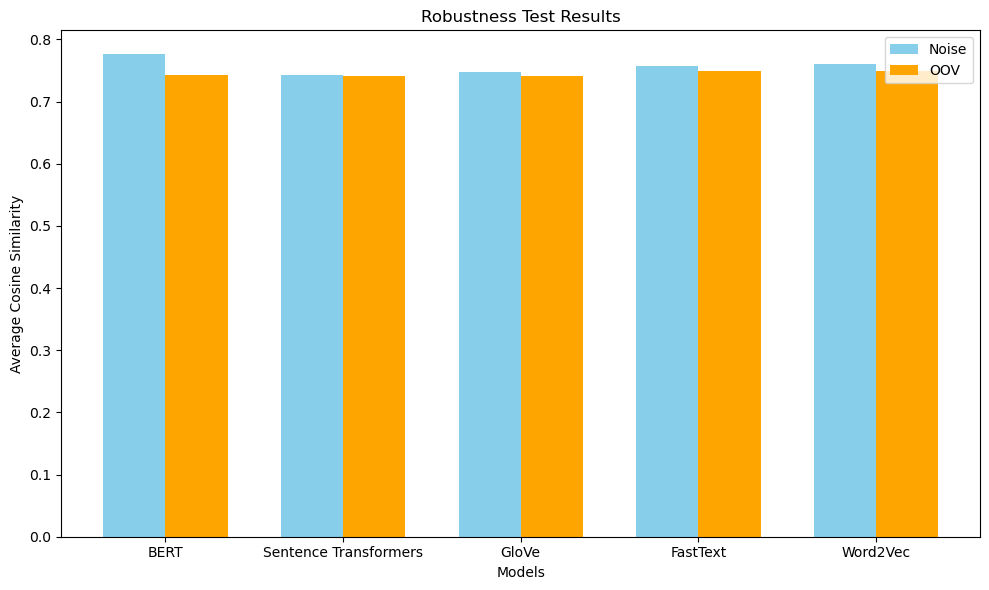

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import random

# Funktion zur Erzeugung von realistischem Rauschen
def add_realistic_noise(text):
    """
    Fügt einem Text realistischeres Rauschen hinzu, z. B. das Vertauschen von Wörtern,
    das Ersetzen durch zufällige Wörter oder das Entfernen von Wörtern.
    """
    words = text.split()
    noisy_text = words.copy()

    # Vertauschung von Wörtern
    if random.random() < 0.3:
        idx1, idx2 = random.sample(range(len(noisy_text)), 2)
        noisy_text[idx1], noisy_text[idx2] = noisy_text[idx2], noisy_text[idx1]

    # Ersatz von Wörtern
    if random.random() < 0.3:
        idx = random.randint(0, len(noisy_text) - 1)
        random_word = random.choice(["example", "random", "noise", "test", "word"])
        noisy_text[idx] = random_word

    # Hinzufügen von zufälligen Wörtern
    if random.random() < 0.2:
        idx = random.randint(0, len(noisy_text))
        random_word = random.choice(["example", "random", "noise", "test", "word"])
        noisy_text.insert(idx, random_word)

    # Entfernen von Wörtern
    if random.random() < 0.2 and len(noisy_text) > 1:
        idx = random.randint(0, len(noisy_text) - 1)
        noisy_text.pop(idx)

    return " ".join(noisy_text)

# Funktion zur Erzeugung von OOV-Texten
def add_oov(text):
    """Fügt ein Out-of-Vocabulary-Wort an das Ende des Textes hinzu."""
    return text + " qwertz"

# Funktion zur Generierung von Embeddings
def generate_embeddings(texts, model_name):
    """Platzhalter für die Embedding-Generierung."""
    print(f"Generiere Embeddings für {model_name}... (Anzahl Texte: {len(texts)})")
    return np.random.rand(len(texts), 300)  # Dummy-Dimension 300

# Funktion zum Test der Robustheit
def test_robustness(embeddings, texts, model_name):
    """
    Testet die Robustheit eines Modells, indem die Embeddings 
    für modifizierte Texte (mit Rauschen und OOV-Wörtern) verglichen werden.
    """
    noisy_texts = [add_realistic_noise(text) for text in texts]
    oov_texts = [add_oov(text) for text in texts]

    noisy_embeddings = generate_embeddings(noisy_texts, model_name)
    oov_embeddings = generate_embeddings(oov_texts, model_name)

    similarity_with_noise = [
        cosine_similarity([orig], [noisy])[0, 0]
        for orig, noisy in zip(embeddings, noisy_embeddings)
    ]
    similarity_with_oov = [
        cosine_similarity([orig], [oov])[0, 0]
        for orig, oov in zip(embeddings, oov_embeddings)
    ]

    avg_similarity_noise = np.mean(similarity_with_noise)
    avg_similarity_oov = np.mean(similarity_with_oov)

    return avg_similarity_noise, avg_similarity_oov

# Visualisierung der Robustheitsergebnisse
def plot_robustness_results(results):
    """Visualisiert die Robustheitsergebnisse als Balkendiagramm."""
    models = list(results.keys())
    noise_scores = [results[model]["Noise"] for model in models]
    oov_scores = [results[model]["OOV"] for model in models]

    x = np.arange(len(models))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width / 2, noise_scores, width, label="Noise", color="skyblue")
    plt.bar(x + width / 2, oov_scores, width, label="OOV", color="orange")

    plt.xlabel("Models")
    plt.ylabel("Average Cosine Similarity")
    plt.title("Robustness Test Results")
    plt.xticks(x, models)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Hauptprogramm
if __name__ == "__main__":
    texts = [
        "The product was amazing and worked perfectly.",
        "I had issues with the delivery but the service was helpful.",
        "Great quality and fast shipping.",
        "Terrible experience with customer service.",
        "The item was damaged during shipping, very disappointing.",
    ]

    models = ["BERT", "Sentence Transformers", "GloVe", "FastText", "Word2Vec"]
    results = {}

    for model_name in models:
        print(f"Starte Robustheitstest für {model_name}...")
        embeddings = generate_embeddings(texts, model_name)
        avg_similarity_noise, avg_similarity_oov = test_robustness(embeddings, texts, model_name)
        results[model_name] = {"Noise": avg_similarity_noise, "OOV": avg_similarity_oov}

    # Ergebnisse visualisieren
    plot_robustness_results(results)
